In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt


Først kigger vi på forskellige k-værdier for den samme partikel

In [28]:
kvec = np.logspace(-4,np.log10(3),30)
uni1 = Class() 
# "H0":67.7
h = 0.6704
dict_uni1 = {"gauge":"sync",
            "h":h,"N_ur": 2.03351,"N_ncdm": 1,"m_ncdm": 10.06,
            "Omega_b":0.07,"Omega_cdm":0.252, 
            'k_output_values':str(kvec).strip('[]'),
            # 'k_output_values':"1e-3,1",
            #"z_pk":'1000.0, 0.0',
             'P_k_max_1/Mpc':3.0,
            'output':'pCl,lCl,mPk,tCl, dTk, vTk',
            "lensing":"yes"
           }
uni1.set(dict_uni1)
uni1.compute()
bg = uni1.get_background()
pb = uni1.get_perturbations()["scalar"][0]

In [25]:
pb.keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])

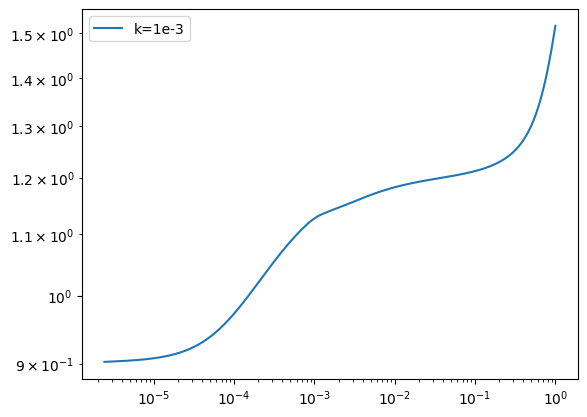

In [33]:
plt.loglog(pb["a"],-pb['delta_cdm'],label="k=1e-3")
#pb1 = uni1.get_perturbations()["scalar"][1]
#plt.loglog(pb1["a"],-pb1['delta_cdm'],label="k=1")
plt.legend()

Samme k-værdi men forskellige partikler

[1.00000000e-06 5.18317621e-06 2.68653156e-05 1.39247665e-04
 7.21745185e-04 3.74093247e-03 1.93899122e-02 1.00501332e-01
 5.20916112e-01 2.70000000e+00]


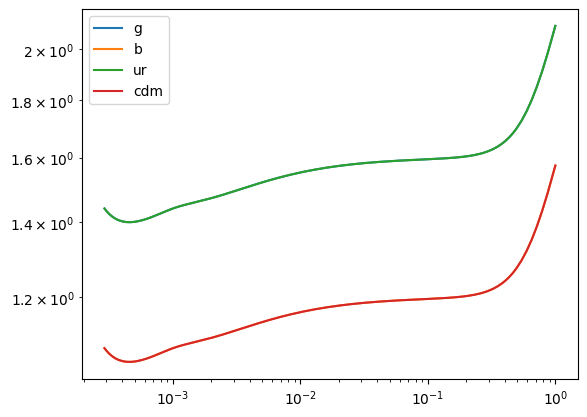

In [27]:
kvec = np.logspace(-6,np.log10(2.7),10)
print(kvec)
uni1 = Class() 
# "H0":67.7
h = 0.6704
dict_uni1 = {"gauge":"sync",
          "h":h,
         "Omega_b":0.07,"Omega_cdm":0.252, 
          'k_output_values':str(kvec).strip('[]'),
          "z_pk":'1000.0, 0.0',
          'output':'tCl, dTk, vTk'}
uni1.set(dict_uni1)
uni1.compute()
bg = uni1.get_background()
da = 3
pb = uni1.get_perturbations()["scalar"]
z = 0
pb0 = pb[0]
tau = pb0['tau [Mpc]']
a = pb0["a"]
value_list = ["g","b","ur","cdm"]

for species in value_list:
    plt.loglog(a,-pb0["delta_"+species],label=species)
plt.legend()
plt.show()